## Normalized Performance vs Baseline (Fig-15: 4-Core Weighted Speedup Metric)

<IPython.core.display.Javascript object>


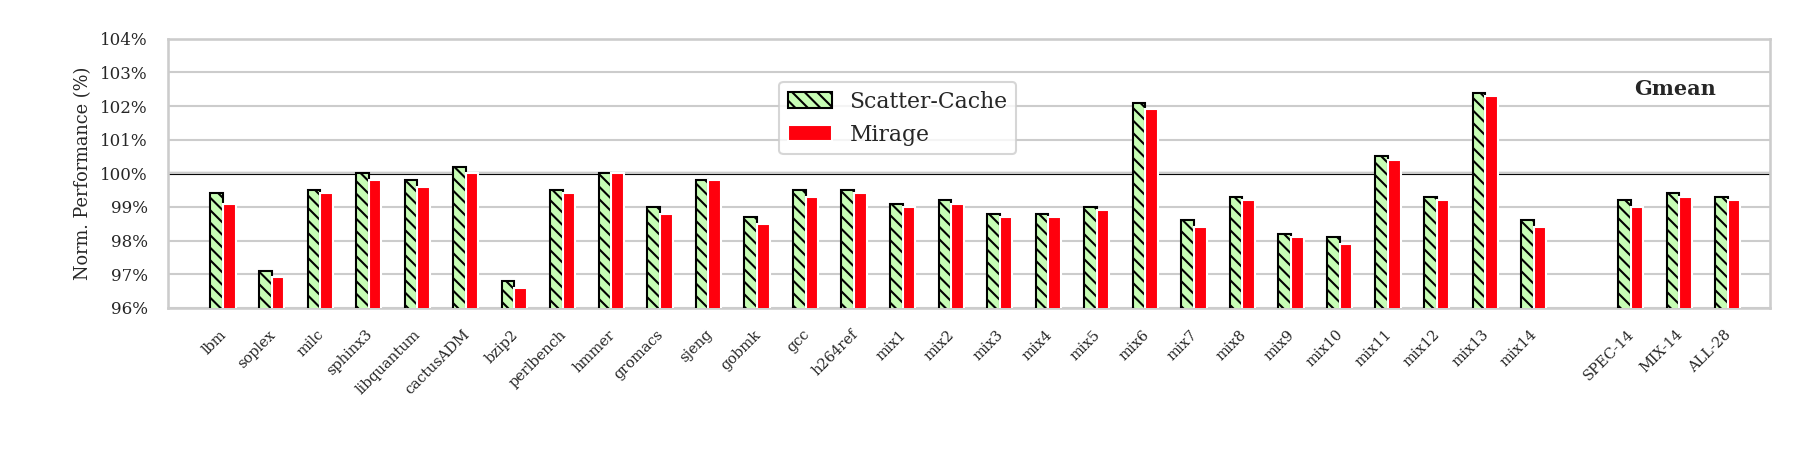

         Expts  Baseline  scatter-cache  MIRAGE
0          lbm       1.0          0.994   0.991
1       soplex       1.0          0.971   0.969
2         milc       1.0          0.995   0.994
3      sphinx3       1.0          1.000   0.998
4   libquantum       1.0          0.998   0.996
5    cactusADM       1.0          1.002   1.000
6        bzip2       1.0          0.968   0.966
7    perlbench       1.0          0.995   0.994
8        hmmer       1.0          1.000   1.000
9      gromacs       1.0          0.990   0.988
10       sjeng       1.0          0.998   0.998
11       gobmk       1.0          0.987   0.985
12         gcc       1.0          0.995   0.993
13     h264ref       1.0          0.995   0.994
14        mix1       1.0          0.991   0.990
15        mix2       1.0          0.992   0.991
16        mix3       1.0          0.988   0.987
17        mix4       1.0          0.988   0.987
18        mix5       1.0          0.990   0.989
19        mix6       1.0          1.021 

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
sns.set_style("whitegrid")
import matplotlib.ticker as mtick
import matplotlib
%matplotlib notebook
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x
#Get Non-Type-3 Fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#Color Palette
color_palette_bar_plot = ['xkcd:blue', 'xkcd:aqua', 'xkcd:coral', 'xkcd:yellowgreen', 'xkcd:ivory', 'xkcd:magenta']
bar_pattern = ["/", ".", "*", "o", "+", "x"]

#Set Font Size
plt.rc('font', family='serif')
plt.rc('font', size='9')

# Read Dataframe
df = pd.read_csv("../stats_scripts/data/perf.stat", delimiter='\s+')
#print (df)

# Set position of bar on X axis
#barwidth
barWidth = 0.26
r1 = np.arange(len(df.index))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

#Create Plot
fig = plt.figure(figsize=(8,2.1))
ax = plt.gca()
#Bars
plt.bar(r2, df['scatter-cache'], width = barWidth, color=sns.xkcd_rgb["pale green"], label='Scatter-Cache',hatch="\\\\\\\\", zorder=10,edgecolor="black",linewidth=1)
plt.bar(r3, df['MIRAGE'], width = barWidth, color=sns.xkcd_rgb["bright red"],label='Mirage',zorder=10)
#Y=1 Black Line
ax.plot([-0.75,len(df.index)+0.25], [1,1],zorder=0,color='black')

# Add xticks on the middle of the group bars
df.at[28,'Expts'] = " "
print (df)
plt.xticks([(r+barWidth*2) for r in range(len(df.index))], df['Expts'])
ax.set_xlim(-0.75,len(df.index)+0.25)
plt.xticks(rotation = 45,ha='right')
ax.tick_params(axis='x', which='major', labelsize=7)
for tick in ax.xaxis.get_major_ticks():
    tick_str = tick.label1.get_text()
    if( (tick_str == "Spec-14") or (tick_str == "Mix-14") or (tick_str == "All-28")):
        tick.label1.set_weight('bold')


#Add Y-axes labels
plt.ylabel('Norm. Performance (%)', size=8.5)
ax.tick_params(axis='y', which='major', labelsize=8)

#Set Y format & limts
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,0))
ax.set_ylim(0.96,1.04)
ax.set_yticks([0.96,0.97,0.98,0.99,1.00,1.01,1.02,1.03,1.04])

#grid
ax.axis('on')
ax.xaxis.grid()
plt.legend(loc='best', bbox_to_anchor=(0.375,0.53),prop={'size': 10.5})


#Text
ax.text(30.3,1.025, 'Gmean', family='serif',size='10',weight='bold',
        ha='center', va='center')


#Figure
plt.tight_layout()
fig.savefig("perf.pdf",bbox_inches='tight')
plt.show()


## Performance vs Encryptor Latency

   EncrLat  Baseline  Scatter-Cache  MIRAGE
0        1       1.0          0.997   0.995
1        2       1.0          0.995   0.993
2        3       1.0          0.993   0.992
3        4       1.0          0.991   0.990
4        5       1.0          0.990   0.988


<IPython.core.display.Javascript object>


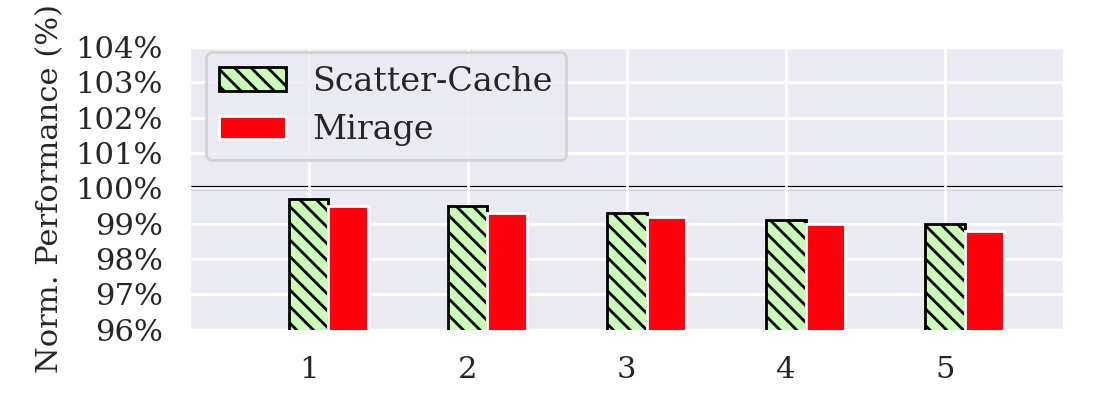

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
#sns.set_style("whitegrid")
from matplotlib.ticker import PercentFormatter
import matplotlib
%matplotlib notebook
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x
#Get Non-Type-3 Fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


#Set Font Size
plt.rc('font', family='serif')
plt.rc('font', size='12')

#Read Dataframe
df = pd.read_csv("../stats_scripts/data/perf.EncLat.stat", delimiter='\s+')
print (df)

#Color Palette
color_palette_bar_plot = ['xkcd:blue', 'xkcd:aqua', 'xkcd:coral', 'xkcd:yellowgreen', 'xkcd:ivory', 'xkcd:magenta']
bar_pattern = ["/", ".", "*", "o", "+", "x"]

# Set position of bar on X axis
barWidth = 0.25
r1 = np.arange(len(df.index))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# plot bars
plt.bar(r2, df['Scatter-Cache'], width = barWidth, color=sns.xkcd_rgb["pale green"],hatch ="\\\\\\\\", label='Scatter-Cache',zorder=10,edgecolor="black")
plt.bar(r3, df['MIRAGE'], width = barWidth, color=sns.xkcd_rgb["bright red"],label='Mirage',zorder=10)
ax = plt.gca()
# line at y=1
ax.plot([-0.75,len(df.index)+0.25], [1,1],zorder=0,color='black')

# axes labels
plt.ylabel('Norm. Performance (%)', size=11)

# add x-ticks
plt.xticks([(r+barWidth) for r in range(len(df.index))], df['EncrLat'])
ax.set_xlim(-0.5,len(df.index))

# set y-ticks format & limts
ax.set_ylim(0.96,1.04)
ax.set_yticks(np.arange (0.96, 1.04, 0.01))
#ax.set_ylim(0.99,1.02)
#ax.set_yticks([0.99,0.995,1,1.005, 1.01,1.015,1.02])
ax.yaxis.set_major_formatter(PercentFormatter(1,0))

# Tick size
ax.tick_params(axis='both', which='major', labelsize=11)

# legend
ax.legend(loc='upper left', bbox_to_anchor=(0, 1.04), prop={'size': 12})

# Save and Show Figure
fig = plt.gcf()
fig.set_figheight(2.1)
fig.set_figwidth(5.5)
plt.tight_layout()
fig.savefig("sens_encr_latency.pdf",bbox_inches='tight')
plt.show()

## Slowdown vs LLC Size (4-Core)

  LLCSz  Baseline  Scatter-Cache  MIRAGE
0   2MB       1.0          0.981   0.979
1   4MB       1.0          0.986   0.985
2   8MB       1.0          0.993   0.992
3  16MB       1.0          0.991   0.990
4  32MB       1.0          0.979   0.978
5  64MB       1.0          0.988   0.986


<IPython.core.display.Javascript object>


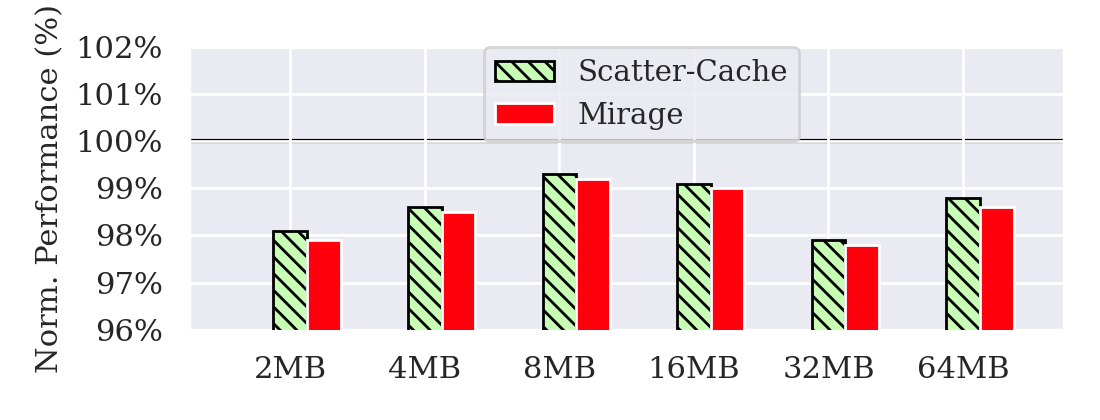

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
#sns.set_style("whitegrid")
from matplotlib.ticker import PercentFormatter
import matplotlib
%matplotlib notebook
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x
#Get Non-Type-3 Fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


#Set Font Size
plt.rc('font', family='serif')
plt.rc('font', size='12')

# Read Dataframe
df = pd.read_csv("../stats_scripts/data/perf.LLCSz.stat", delimiter='\s+')
print (df)

# Color Palette
color_palette_bar_plot = ['xkcd:blue', 'xkcd:aqua', 'xkcd:coral', 'xkcd:yellowgreen', 'xkcd:ivory', 'xkcd:magenta']
bar_pattern = ["/", ".", "*", "o", "+", "x"]

# Set position of bar on X axis
barWidth = 0.25
r1 = np.arange(len(df.index))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# plot bars
plt.bar(r2, df['Scatter-Cache'], width = barWidth, color=sns.xkcd_rgb["pale green"],hatch ="\\\\\\\\", label='Scatter-Cache',zorder=10,edgecolor='black')
plt.bar(r3, df['MIRAGE'], width = barWidth, color=sns.xkcd_rgb["bright red"],label='Mirage',zorder=10)
ax = plt.gca()

# line at y=1
ax.plot([-0.75,len(df.index)+0.25], [1,1],zorder=0,color='black')

# axes labels
plt.ylabel('Norm. Performance (%)', size=11)

# add x-ticks
plt.xticks([(r+barWidth) for r in range(len(df.index))], df['LLCSz'])
ax.set_xlim(-0.5,len(df.index))

# set y-ticks format & limts
ax.set_ylim(0.96,1.02)
ax.set_yticks(np.arange (0.96, 1.02, 0.01))
ax.yaxis.set_major_formatter(PercentFormatter(1,0))

# Tick size
ax.tick_params(axis='both', which='major', labelsize=11)

# legend
ax.legend(loc='upper left', bbox_to_anchor=(0.32, 1.05), prop={'size': 10.5})

fig = plt.gcf()
fig.set_figheight(2.1)
fig.set_figwidth(5.5)
plt.tight_layout()
fig.savefig("sensitivity_cachesz.pdf",bbox_inches='tight')
plt.show()